In [1]:
%matplotlib inline

import numpy as np
import power_laws
import matplotlib.colors
import seaborn
import pandas as pd
import rubisco_data

from scipy import stats, special
from matplotlib import pyplot as plt


In [2]:
# Load the data from Excel, remove data points that are not comparable.
# raw_kin_df is everything in the file, kin_df is the subset with all relevant kinetic data.
raw_kin_df, kin_df = rubisco_data.load_rubisco_data()

# Subset the data in various ways for future use
raw_kin_df, savir_df, nonsavir_df = rubisco_data.filter_data(raw_kin_df)

# Merge multiple measurements of the same organism by taking the median value.
merged_kin_df = rubisco_data.merge_organisms(raw_kin_df)

# Markers we use for plotting below.
markers = 'o><^dsphH*'

cnames = ["windows blue", "amber", "greyish brown", "dusty purple", "dusty teal", "dusty red", ]
named_colors = seaborn.xkcd_palette(cnames)

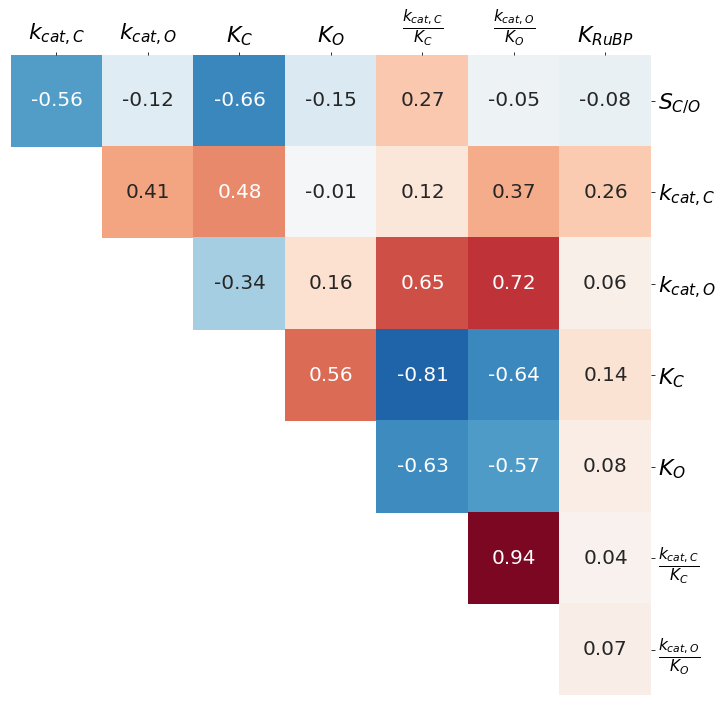

In [3]:
# Summary of correlations among FI Rubiscos
cols = ['S', 'vC', 'vO', 'KC', 'KO', 'kon_C', 'kon_O', 'KRuBP',]
titles = {'S': '$S_{C/O}$', 'vC': '$k_{cat,C}$', 'KC':
          '$K_C$', 'vO': '$k_{cat,O}$', 'KO': '$K_O$',
          'KRuBP': '$K_{RuBP}$',
          'kon_C': '$\\frac{k_{cat,C}}{K_C}$',
          'kon_O': '$\\frac{k_{cat,O}}{K_O}$'}
ticks = [titles[c] for c in cols]

# Can calculate correlation matrix with pandas, but it doesn't give pvals. 
all_FI = merged_kin_df[merged_kin_df.isoform == '1']
corrM = np.log10(all_FI[cols]).corr()
corrM += np.diag([np.NaN] * len(cols))
corrM = np.triu(corrM)
corrM[np.where(corrM == 0)] = np.NaN

        
figure = plt.figure(figsize=(10, 10))

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

seaborn.heatmap(corrM[:-1,1:], square=True, center=0, 
                cmap="RdBu_r", vmin=-1, vmax=1,
                annot=True, cbar=False, annot_kws={'fontsize': 20}, fmt='.2f')

xax = figure.get_axes()[0]
xax.xaxis.tick_top()
xax.yaxis.tick_right()

tickrange = np.arange(len(cols)-1) + 0.5
plt.xticks(tickrange, ticks[1:], fontsize=22)
plt.yticks(tickrange, ticks[:-1], fontsize=22, rotation='horizontal')

plt.tight_layout()
plt.savefig('fig4/fig4_FI_all_corr_standalone.png', dpi=400)

plt.show()

In [4]:
F1_data = merged_kin_df[merged_kin_df.isoform == '1']
cols = ['S', 'vC', 'vO', 'KC', 'KO', 'KRuBP']
conf_range = [2.5, 97.5]


for c in cols:
    mask_all = merged_kin_df[c].notnull()
    mask_F1 = F1_data[c].notnull()
    all_interval = np.percentile(merged_kin_df[mask_all][c], conf_range)
    F1_interval = np.percentile(F1_data[mask_F1][c], conf_range)
    median_all = np.median(merged_kin_df[mask_all][c])
    median_F1 = np.median(F1_data[mask_F1][c])
    
    print('95% CI', c, all_interval)
    print('median', c, median_all)
    print('F1 central 95%', c, F1_interval)
    print('F1 median', c, median_F1)
    print()
    

95% CI S [ 30.94 126.2 ]
median S 94.3
F1 central 95% S [ 44.2575 126.9   ]
F1 median S 95.2

95% CI vC [1.32 7.18]
median vC 3.25
F1 central 95% vC [1.5905 7.085 ]
F1 median vC 3.26

95% CI vO [0.2894 2.274 ]
median vO 0.971
F1 central 95% vO [0.3118  2.24975]
F1 median vO 0.9735

95% CI KC [  7.0775 163.6125]
median KC 16.0
F1 central 95% KC [  7.0625 157.5625]
F1 median KC 15.850000000000001

95% CI KO [ 213.925 1292.25 ]
median KO 467.5
F1 central 95% KO [ 254.125 1293.75 ]
F1 median KO 468.5

95% CI KRuBP [ 3.84 67.22]
median KRuBP 18.799999999999997
F1 central 95% KRuBP [ 6.9675 68.58  ]
F1 median KRuBP 19.85



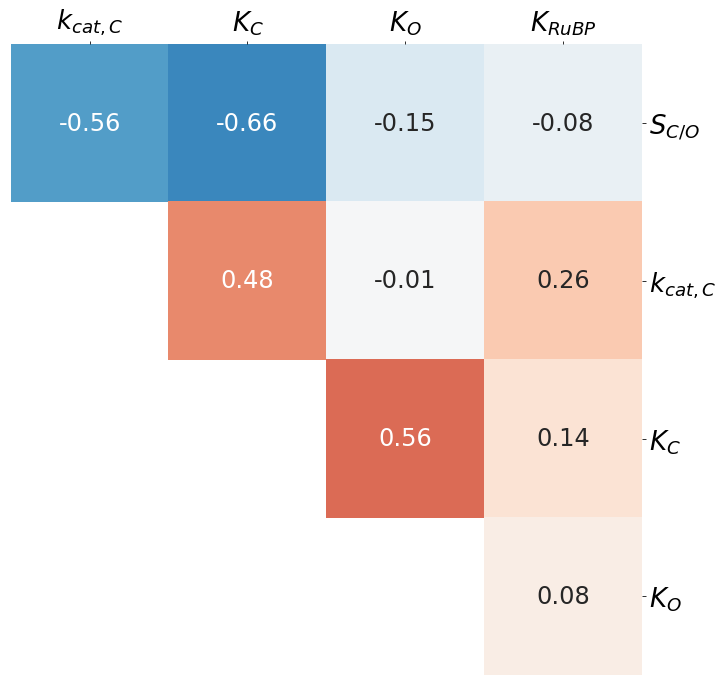

In [5]:
# Summary of correlations among FI Rubiscos, restricted to directly measured parameters. 
cols = ['S', 'vC', 'KC', 'KO', 'KRuBP',]
titles = {'S': '$S_{C/O}$', 'vC': '$k_{cat,C}$', 'KC':
          '$K_C$', 'vO': '$k_{cat,O}$', 'KO': '$K_O$',
          'KRuBP': '$K_{RuBP}$',
          'kon_C': '$\\frac{k_{cat,C}}{K_C}$',
          'kon_O': '$\\frac{k_{cat,O}}{K_O}$'}
ticks = [titles[c] for c in cols]

# Can calculate correlation matrix with pandas, but it doesn't give pvals. 
all_FI = merged_kin_df[merged_kin_df.isoform == '1']
corrM = np.log10(all_FI[cols]).corr()
corrM += np.diag([np.NaN] * len(cols))
corrM = np.triu(corrM)
corrM[np.where(corrM == 0)] = np.NaN

        
figure = plt.figure(figsize=(10, 10))

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

seaborn.heatmap(corrM[:-1,1:], square=True, center=0, 
                cmap="RdBu_r", vmin=-1, vmax=1,
                annot=True, cbar=False, annot_kws={'fontsize': 24}, fmt='.2f')

xax = figure.get_axes()[0]
xax.xaxis.tick_top()
xax.yaxis.tick_right()

tickrange = np.arange(len(cols)-1) + 0.5
plt.xticks(tickrange, ticks[1:], fontsize=26)
plt.yticks(tickrange, ticks[:-1], fontsize=26, rotation='horizontal')

plt.tight_layout()
plt.savefig('fig4/fig4_FI_measured_corr_standalone.png', dpi=400)

plt.show()

In [6]:
# Calculate R and P for all the pairs, using a Bonferroni correction 
# on P since we have multiple comparisions here. 
# Only considering the primary measurements
cols = ['S', 'vC', 'vO', 'KC', 'KO', 'KRuBP']
log_data = np.log10(all_FI[cols]) 
# number of comparisons is (N choose 2)
bonferroni_correction = special.binom(len(cols), 2)
for col1 in cols:
    for col2 in cols:
        if col1 == col2:
            continue
        
        x, y = log_data[col1], log_data[col2]
        mask = x.notnull() & y.notnull()
        r, p = stats.pearsonr(x[mask], y[mask])
        if np.abs(r) > 0.4:
            print(col1, col2)
            print('R = %.2f, P = %.2g' % (r, p*bonferroni_correction))
            

S vC
R = -0.56, P = 8.3e-18
S KC
R = -0.66, P = 1.9e-28
vC S
R = -0.56, P = 8.3e-18
vC vO
R = 0.41, P = 2.3e-07
vC KC
R = 0.48, P = 5.1e-14
vO vC
R = 0.41, P = 2.3e-07
KC S
R = -0.66, P = 1.9e-28
KC vC
R = 0.48, P = 5.1e-14
KC KO
R = 0.56, P = 3.6e-19
KO KC
R = 0.56, P = 3.6e-19
